<a href="https://colab.research.google.com/github/nj-ubu/1306370-Principles-of-Communications/blob/main/commuCode_CH04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

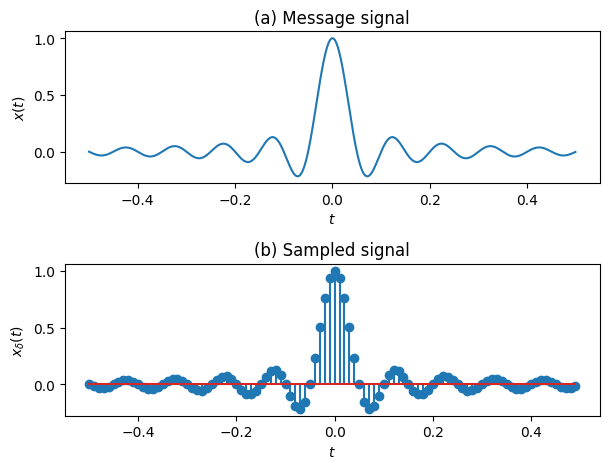

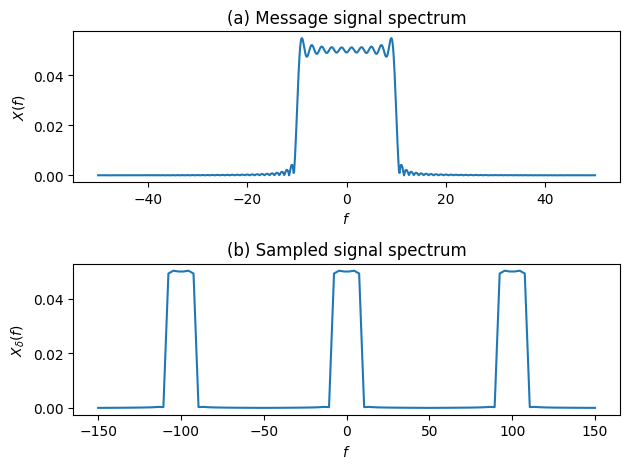

In [ ]:
#Fig:4-1--2 (sampling theorem)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
duration = 1  # Duration of signal in seconds
sampling_rate = 100  # Sampling rate in Hz
A = 1  # Amplitude of the message signal
W = 10  # Bandwidth of the message signal in Hz

# Function to compute Fourier transform using numerical integration with np.trapz
def fourier_transform(signal, frequencies, time):
    X = np.zeros_like(frequencies, dtype=np.complex128)
    for i, freq in enumerate(frequencies):
        complex_exp = np.exp(-2j * np.pi * freq * time)
        X[i] = np.trapz(signal * complex_exp, time)
    return X

# Define the continuous-time signal
def continuous_signal(t):
    return A * np.sinc(2 * W * t)

# Time array for continuous signal
t_cont = np.linspace(-duration/2, duration/2, 1000, endpoint=False)
signal_cont = continuous_signal(t_cont)

# Sampling interval and time instants
T_s = 1 / sampling_rate
t_sample = np.arange(-duration/2, duration/2, T_s)

# Sampled signal values
signal_sampled = continuous_signal(t_sample)

# Generate the impulse train for sampled signal
impulse_train = np.zeros_like(t_cont)
for t in t_sample:
    impulse_index = np.argmin(np.abs(t_cont - t))
    impulse_train[impulse_index] = signal_sampled[np.argmin(np.abs(t_sample - t))]

# Frequency range
freq_range = np.linspace(-sampling_rate / 2, sampling_rate / 2, len(t_cont))
freq_range2 = np.linspace(-3 * sampling_rate / 2, 3 * sampling_rate / 2, len(t_sample))

# Compute Fourier transform of the message signal
spectrum_msg = fourier_transform(signal_cont, freq_range, t_cont)

# Compute Fourier transform of the sampled signal
spectrum_sample = fourier_transform(signal_sampled, freq_range2, t_sample)

# Plot continuous-time signal and sampled signal
plt.subplot(2, 1, 1)
plt.plot(t_cont, signal_cont)
plt.title('(a) Message signal')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')

plt.subplot(2, 1, 2)
plt.stem(t_sample, signal_sampled)
plt.title('(b) Sampled signal')
plt.xlabel('$t$')
plt.ylabel('$x_{\delta}(t)$')
plt.tight_layout()
plt.show()

# Plot continuous-time signal and sampled signal spectrum
plt.subplot(2, 1, 1)
plt.plot(freq_range, np.abs(spectrum_msg))
#plt.xlim([-sampling_rate - 50, sampling_rate + 50])
plt.title('(a) Message signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$X(f)$')

plt.subplot(2, 1, 2)
plt.plot(freq_range2, np.abs(spectrum_sample))
#plt.xlim([-sampling_rate - 50, sampling_rate + 50])
plt.title('(b) Sampled signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$X_{\delta}(f)$')
plt.tight_layout()
plt.show()

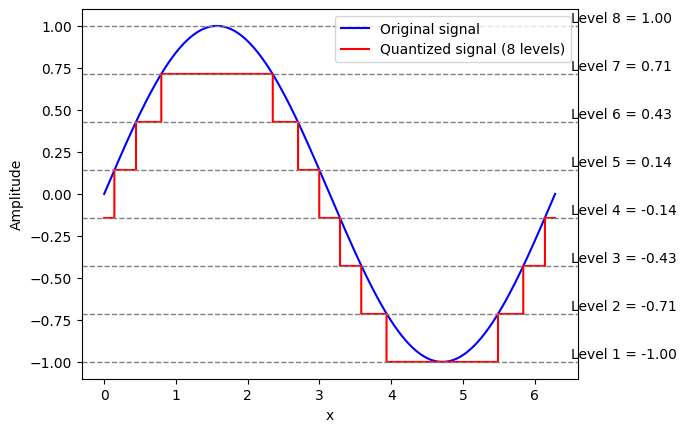

In [ ]:
#Fig:4-3 (scalar quantization)
import numpy as np
import matplotlib.pyplot as plt

# Generating a sine wave signal
x = np.linspace(0, 2 * np.pi, 1000)
signal = np.sin(x)

# Define quantization levels (8 levels for 3-bit quantization)
levels = np.linspace(-1, 1, 8)

# Perform quantization
quantized_signal = np.digitize(signal, levels) - 1
quantized_signal = levels[quantized_signal]

# Plot the original signal and the quantized signal
#plt.figure(figsize=(10, 6))
plt.plot(x, signal, label="Original signal", color='blue', linewidth=1.5)
plt.step(x, quantized_signal, label="Quantized signal (8 levels)", color='red', linewidth=1.5, where='mid')

# Highlight the eight quantization levels
i = 1
for level in levels:
    plt.axhline(y=level, color='gray', linestyle='--', linewidth=1)
    plt.text(6.5, level + 0.02, f"Level {i} = {level:.2f}", color='black')
    i = i + 1

#plt.title("Example of an Eight-Level Quantization Scheme")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()
#plt.grid(True)
plt.show()

<ipython-input-11-8ab811706998>:11: RuntimeWarning: divide by zero encountered in log
  return np.sign(x) * (1 + np.log(A * np.abs(x))) / (1 + np.log(A))
<ipython-input-11-8ab811706998>:11: RuntimeWarning: invalid value encountered in multiply
  return np.sign(x) * (1 + np.log(A * np.abs(x))) / (1 + np.log(A))


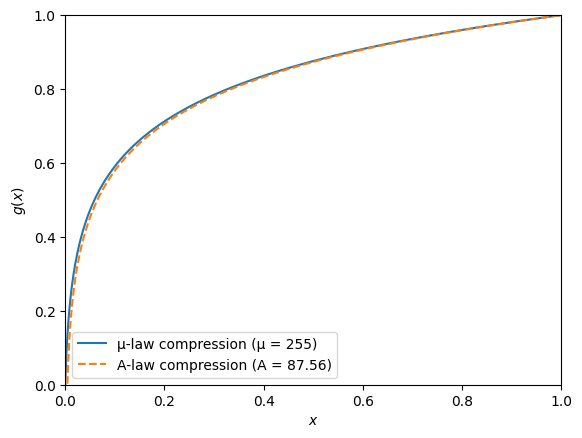

In [ ]:
#Fig:4-4 (non-uniform quantization)
import numpy as np
import matplotlib.pyplot as plt
# Generate a range of input values between 0 and 1
x_positive = np.linspace(0, 1, 1000)
mu = 255
A = 87.6

def mu_law_compression(x, mu):
    return np.sign(x) * np.log(1 + mu * np.abs(x)) / np.log(1 + mu)
def a_law_compression_stable(x, A):
    return np.sign(x) * (1 + np.log(A * np.abs(x))) / (1 + np.log(A))
    #small_threshold = 1e-12  # Small value to prevent log(0) issues
    #return np.where(np.abs(x) <= 1/A, A * x, np.sign(x) * (1 + np.log(np.maximum(A * np.abs(x), small_threshold))) / (1 + np.log(A)))

# Compute the compression values for µ-law and A-law for the positive range
mu_law_compressed_positive = mu_law_compression(x_positive, mu)
a_law_compressed_positive_stable = a_law_compression_stable(x_positive, A)

# Re-plot the results for the positive range with the corrected A-law compression and sgn(x)
plt.plot(x_positive, mu_law_compressed_positive, label='µ-law compression (µ = 255)')
plt.plot(x_positive, a_law_compressed_positive_stable, label='A-law compression (A = 87.56)', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.legend()
plt.show()

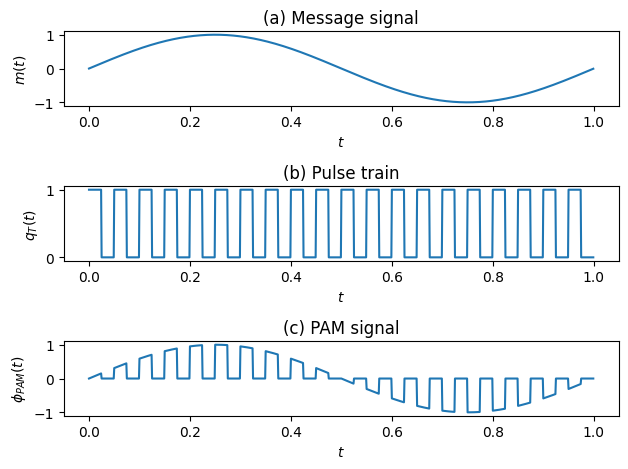

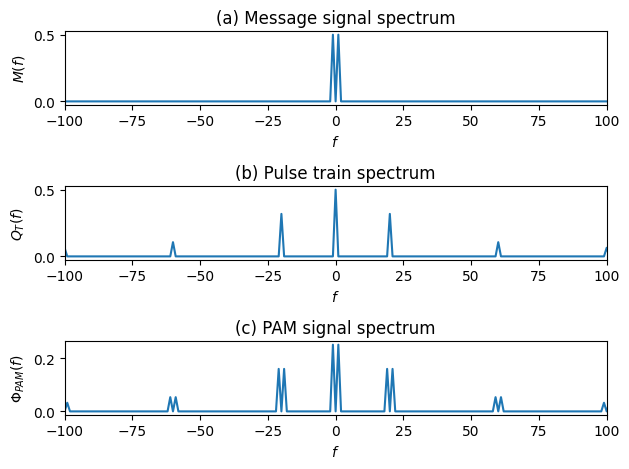

In [2]:
#Fig:4-5--6 (PAM)
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch

# Define sampling parameters
Fs = 1000  # Sampling frequency in Hz
t = np.arange(0, 1, 1/Fs)  # Time vector from 0 to 1 second

# Define the original message signal
# m(t) is a sine wave
fm = 1  # Frequency of the message signal (Hz)
Am = 1  # Amplitude of the message signal
m_t = Am * np.sin(2 * np.pi * fm * t)  # Sine wave signal

# Create pulse train for PAM modulation with 50% duty cycle
Ts = 0.05  # Period of the pulse train in seconds
pulse_train = np.zeros_like(t)  # Initialize pulse train to zeros
half_period_samples = int((Ts / 2) * Fs)  # Calculate number of samples for half period
period_samples = int(Ts * Fs)  # Calculate total number of samples in one period

# Generate pulse train with 50% duty cycle
for i in range(0, len(t), period_samples):
    pulse_train[i:i + half_period_samples] = 1  # Set the first half of each period to 1

# Generate PAM signal
phi_PAM = m_t * pulse_train  # Modulate message signal using PAM by multiplying with the pulse train

# Fourier Transform for frequency domain analysis
M_f = np.fft.fftshift(np.fft.fft(m_t))  # FFT of the original signal (centered at zero)
PAM_f = np.fft.fftshift(np.fft.fft(phi_PAM))  # FFT of the PAM signal (centered at zero)
f = Fs * np.arange(-len(t)/2, len(t)/2) / len(t)  # Frequency vector centered at 0 Hz

# Plot message, pulse train and PAM signal (time domain)
plt.subplot(3, 1, 1)
plt.plot(t, m_t)
plt.title('(a) Message signal')
plt.xlabel('$t$')
plt.ylabel('$m(t)$')

plt.subplot(3, 1, 2)
plt.plot(t, pulse_train)
plt.title('(b) Pulse train')
plt.xlabel('$t$')
plt.ylabel('$q_{T}(t)$')

plt.subplot(3, 1, 3)
plt.plot(t, phi_PAM)
plt.title('(c) PAM signal')
plt.xlabel('$t$')
plt.ylabel('$\phi_{PAM}(t)$')
plt.tight_layout()
plt.show()

# Plot message, pulse train and PAM signal spectrum (frequency domain)
plt.subplot(3, 1, 1)
plt.plot(f, np.abs(M_f)/len(t))
plt.title('(a) Message signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$M(f)$')
plt.xlim(-100,100)

plt.subplot(3, 1, 2)
plt.plot(f, np.abs(np.fft.fftshift(np.fft.fft(pulse_train)))/len(t))
plt.title('(b) Pulse train spectrum')
plt.xlabel('$f$')
plt.ylabel('$Q_{T}(f)$')
plt.xlim(-100,100)

plt.subplot(3, 1, 3)
plt.plot(f, np.abs(PAM_f)/len(t))
plt.title('(c) PAM signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$\Phi_{PAM}(f)$')
plt.xlim(-100,100)
plt.tight_layout()
plt.show()

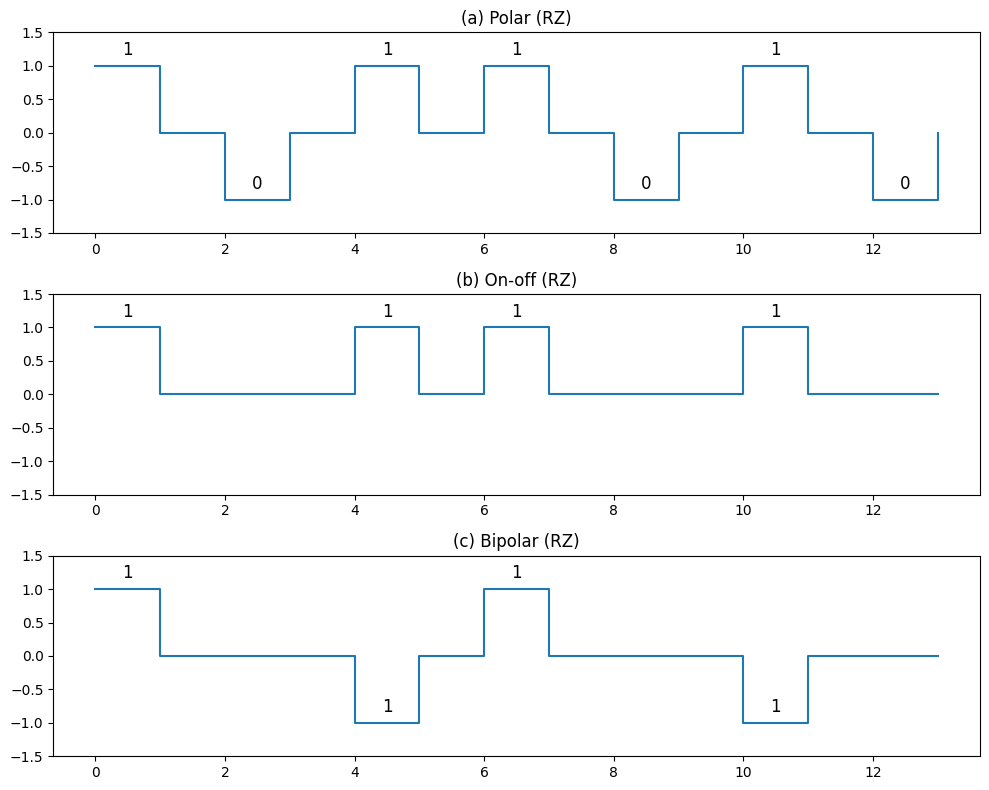

In [16]:
#Fig:4-7 (line coding signal)
import numpy as np
import matplotlib.pyplot as plt

def polar_rz(bits):
    signal = []
    for bit in bits:
        if bit == 1:
            signal.extend([1, 0])  # Positive voltage for '1', then Return to Zero
        else:
            signal.extend([-1, 0])  # Negative voltage for '0', then Return to Zero
    return signal

def on_off_rz(bits):
    signal = []
    for bit in bits:
        if bit == 1:
            signal.extend([1, 0])  # Positive voltage for '1', then Return to Zero
        else:
            signal.extend([0, 0])  # Zero voltage for '0' (stays zero)
    return signal

def bipolar_rz(bits):
    signal = []
    last_polarity = 1  # Start with positive polarity
    for bit in bits:
        if bit == 1:
            signal.extend([last_polarity, 0])  # Alternate positive/negative voltage for '1'
            last_polarity *= -1  # Flip polarity for next '1'
        else:
            signal.extend([0, 0])  # Zero voltage for '0'
    return signal

def label_bits(ax, bits, signal):
    for i, bit in enumerate(bits):
        # Label position: in the middle of the pulse (i.e., at step 1 of each bit)
        mid_position = i * 2 + 0.5
        if signal[i * 2] != 0:  # Only label non-zero pulses
            ax.text(mid_position, signal[i * 2] + 0.1, str(bit), ha='center', va='bottom', fontsize=12)

# Simulation Parameters
bits = [1, 0, 1, 1, 0, 1, 0]  # Example bit sequence

# Generate the signals
polar_signal = polar_rz(bits)
onoff_signal = on_off_rz(bits)
bipolar_signal = bipolar_rz(bits)

# Plotting the signals
plt.figure(figsize=(10, 8))

# Polar RZ plot
ax1 = plt.subplot(3, 1, 1)
plt.step(range(len(polar_signal)), polar_signal, where='post')
plt.title("(a) Polar (RZ)")
#plt.grid(True)
plt.ylim([-1.5, 1.5])
label_bits(ax1, bits, polar_signal)

# On-Off RZ plot
ax2 = plt.subplot(3, 1, 2)
plt.step(range(len(onoff_signal)), onoff_signal, where='post')
plt.title("(b) On-off (RZ)")
#plt.grid(True)
plt.ylim([-1.5, 1.5])
label_bits(ax2, bits, onoff_signal)

# Bipolar RZ plot
ax3 = plt.subplot(3, 1, 3)
plt.step(range(len(bipolar_signal)), bipolar_signal, where='post')
plt.title("(c) Bipolar (RZ)")
#plt.grid(True)
plt.ylim([-1.5, 1.5])
label_bits(ax3, bits, bipolar_signal)

plt.tight_layout()
plt.show()


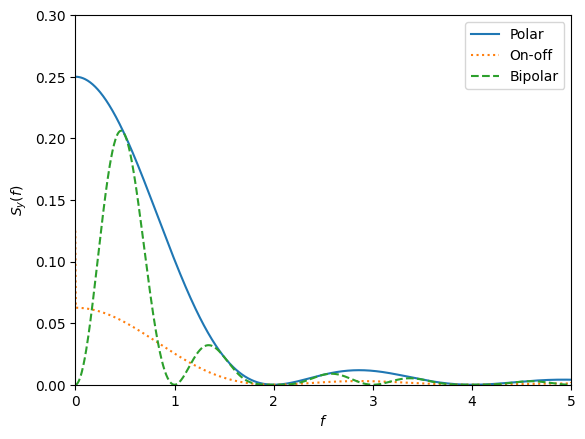

In [27]:
#Fig:4-8 (line coding PSD)
import numpy as np
import matplotlib.pyplot as plt

def sinc(x):
    """Normalized sinc function."""
    return np.sinc(x / np.pi)  # np.sinc normalizes by pi

def polar_psd(f, Tb):
    """Compute the PSD for Polar RZ coding."""
    return (Tb / 4) * sinc(np.pi * f * Tb / 2)**2

def on_off_psd(f, Tb):
    """Compute the PSD for On-Off RZ coding."""
    # Approximate delta functions in the sum
    delta_terms = np.zeros_like(f)
    for n in range(-10, 11):  # Approximate delta spikes
        delta_terms += np.where(f == n / Tb, 1, 0)
    return (Tb / 16) * sinc(np.pi * f * Tb / 2)**2 * (1 + delta_terms / Tb)

def bipolar_psd(f, Tb):
    """Compute the PSD for Bipolar RZ coding."""
    return (Tb / 4) * sinc(np.pi * f * Tb / 2)**2 * np.sin(np.pi * f * Tb)**2

# Parameters
f = np.linspace(0, 5, 1000)  # Frequency range from 0 to 5 Hz
Tb = 1  # Pulse duration

# Compute PSDs
psd_polar = polar_psd(f, Tb)
psd_on_off = on_off_psd(f, Tb)
psd_bipolar = bipolar_psd(f, Tb)

# Plotting the PSD
plt.figure(figsize=(6.4, 4.8))

plt.plot(f, psd_polar, label='Polar')
plt.plot(f, psd_on_off, label='On-off', linestyle='dotted')
plt.plot(f, psd_bipolar, label='Bipolar', linestyle='dashed')

#plt.title('Power Spectral Density of Line Coding Schemes')
plt.xlabel('$f$')
plt.ylabel('$S_{y}(f)$')
plt.ylim(0, 0.3)  # Limit the y-axis for better visibility
plt.xlim(0, 5)    # Set x-axis limits for better visibility
#plt.grid()
plt.legend()
plt.show()

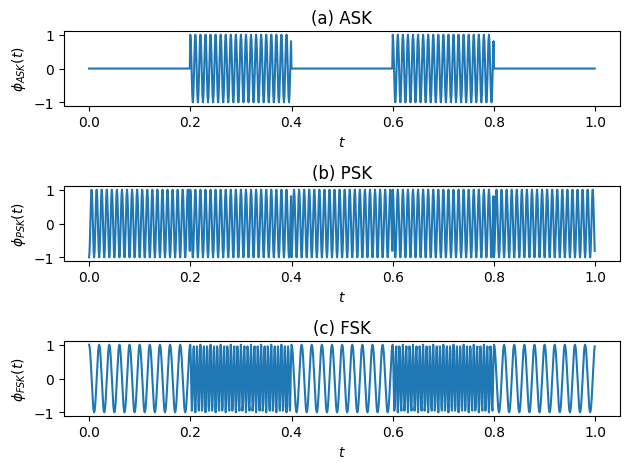

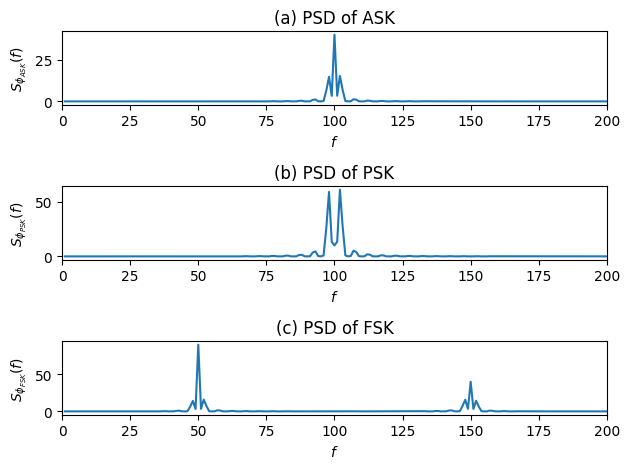

In [50]:
#Fig:4-9--10 (ASK, PSK, FSK signal)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1          # Amplitude
fc = 100         # Carrier frequency (Hz)
fs = 1000       # Sampling frequency (Hz)
T = 1          # Duration of the signal (seconds)
t = np.arange(0, T, 1/fs)  # Time vector

# Binary input signal
m = np.array([0, 1, 0, 1, 0])  # Binary message (5 bits)
bit_duration = T / len(m)       # Duration of each bit

# Generate ASK Signal
ask_signal = np.zeros(len(t))
for i, bit in enumerate(m):
    ask_signal[int(i * bit_duration * fs):int((i + 1) * bit_duration * fs)] = (
        A * bit * np.cos(2 * np.pi * fc * t[int(i * bit_duration * fs):int((i + 1) * bit_duration * fs)])
    )

# Generate PSK Signal
psk_signal = np.zeros(len(t))
for i, bit in enumerate(m):
    phase = 0 if bit == 1 else np.pi  # 0 degrees for '1', 180 degrees for '0'
    psk_signal[int(i * bit_duration * fs):int((i + 1) * bit_duration * fs)] = (
        A * np.cos(2 * np.pi * fc * t[int(i * bit_duration * fs):int((i + 1) * bit_duration * fs)] + phase)
    )

# Generate FSK Signal
f0 = 50  # Frequency for binary '0'
f1 = 150  # Frequency for binary '1'
fsk_signal = np.zeros(len(t))
for i, bit in enumerate(m):
    frequency = f1 if bit == 1 else f0
    fsk_signal[int(i * bit_duration * fs):int((i + 1) * bit_duration * fs)] = (
        A * np.cos(2 * np.pi * frequency * t[int(i * bit_duration * fs):int((i + 1) * bit_duration * fs)])
    )

# Function to compute and plot PSD
def plot_psd(signal, fs):
    # Calculate the FFT
    freqs = np.fft.fftfreq(len(signal), d=1/fs)
    fft_signal = np.fft.fft(signal)
    psd = np.abs(fft_signal) ** 2 / len(signal)  # Normalize the PSD

    # Only take the positive frequencies
    pos_mask = freqs > 0
    plt.plot(freqs[pos_mask], psd[pos_mask])

# Plotting the signals
plt.figure(figsize=(6.4, 4.8))

# Plot ASK
plt.subplot(3, 1, 1)
plt.plot(t, ask_signal)
plt.title('(a) ASK')
plt.xlabel('$t$')
plt.ylabel('$\phi_{ASK}(t)$')

# Plot PSK
plt.subplot(3, 1, 2)
plt.plot(t, psk_signal)
plt.title('(b) PSK')
plt.xlabel('$t$')
plt.ylabel('$\phi_{PSK}(t)$')

# Plot FSK
plt.subplot(3, 1, 3)
plt.plot(t, fsk_signal)
plt.title('(c) FSK')
plt.xlabel('$t$')
plt.ylabel('$\phi_{FSK}(t)$')
plt.tight_layout()
plt.show()

# Plotting the PSDs
plt.figure(figsize=(6.4, 4.8))

# Plot PSD of ASK
plt.subplot(3, 1, 1)
plot_psd(ask_signal, fs)
plt.title('(a) PSD of ASK')
plt.xlabel('$f$')
plt.ylabel('$S_{\phi_{ASK}}(f)$')
plt.xlim(0, 200)

# Plot PSD of PSK
plt.subplot(3, 1, 2)
plot_psd(psk_signal, fs)
plt.title('(b) PSD of PSK')
plt.xlabel('$f$')
plt.ylabel('$S_{\phi_{PSK}}(f)$')
plt.xlim(0, 200)

# Plot PSD of FSK
plt.subplot(3, 1, 3)
plot_psd(fsk_signal, fs)
plt.title('(c) PSD of FSK')
plt.xlabel('$f$')
plt.ylabel('$S_{\phi_{FSK}}(f)$')
plt.xlim(0, 200)
plt.tight_layout()
plt.show()